<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment/blob/main/AnamolyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install pycaret

In [48]:
from pycaret.anomaly import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [49]:
# Assuming the dataset is named 'creditcard.csv'
data = pd.read_csv('/content/creditcard 2.csv')

In [50]:
model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination as needed
model.fit(data)

IsolationForest(contamination=0.01, random_state=42)

In [51]:
# Predict anomalies
predictions = model.predict(data)

# Convert predictions to a DataFrame
results = pd.DataFrame({'Data Point': range(len(data)), 'Anomaly': predictions})
print(results)
# Print the number of anomalies detected
print("Number of anomalies detected:", len(results[results['Anomaly'] == -1]))

        Data Point  Anomaly
0                0        1
1                1        1
2                2        1
3                3        1
4                4        1
...            ...      ...
284802      284802       -1
284803      284803        1
284804      284804        1
284805      284805        1
284806      284806        1

[284807 rows x 2 columns]
Number of anomalies detected: 2849


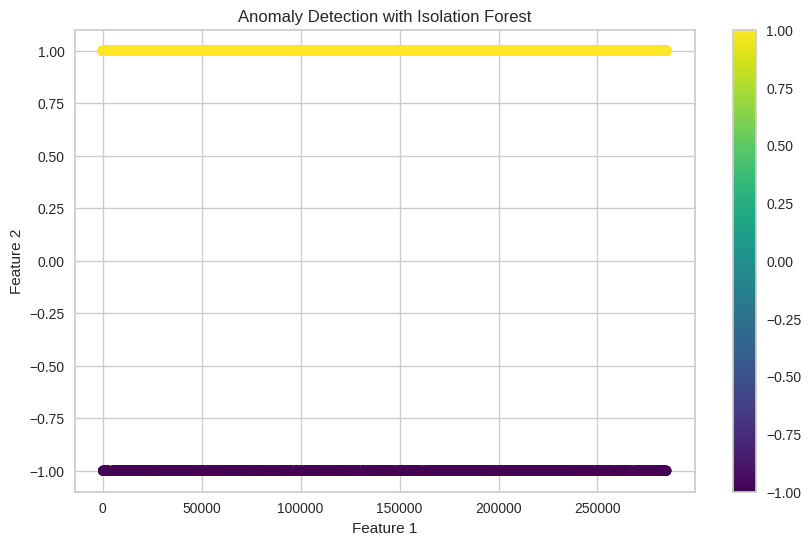

In [53]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(results['Data Point'], results['Anomaly'], c=predictions, cmap='viridis')
plt.colorbar()
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()